# Load Dependencies

In [1]:
%matplotlib inline

import re
import glob
import os
import json
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastprogress.fastprogress import master_bar, progress_bar
import sys
sys.path.append('../../scripts/')

from config_plots import global_settings
global_settings()

from parse_results import parse_results

import warnings
warnings.filterwarnings("ignore")

os.chdir('../../eval_saved/different_train_size/results/')

-------------------
# Find Model

In [2]:
def find_model(name, train_size, target_dir="", keys=None):
    result_list = glob.glob(target_dir + '*.txt')
    if len(result_list):
        results = []
        for file in result_list:
            d = parse_results(file)
            if d['name'] == name and d["params"]["data_params"]["train_size"] == train_size:
                results.append(d)
        print(name, len(results))
        return results
    else:
        raise RuntimeError(
            "No txt file find under the directory. Please use os.chdir(TARGET DIR) before use it, or specify target_dir parameter."
        )
        
def replace_str(fin, fout, str_in, str_out):
    fin = open(fin, "rt")
    fout = open(fout, "wt")
    for line in fin:
        fout.write(line.replace(str_in, str_out))
    fin.close()
    fout.close()

## Table of Results on 2k Training Data

In [3]:
model_list = ['DNN', 'NSE-NNex', 'NSE-NNex-LF', 'vNSE-NNex', 'cNSE-NNex', 'cNSE-NN', 'cNS-NNex', 'cNSE-NNex-LF']
mse, overlap = {}, {}
for model in model_list:
    results = find_model(model, 1000)
    mse[model] = [i['mse_wave_funtion'] for i in results]
    overlap[model] = [i['wave_function_overlap'] for i in results]
mse_df = pd.DataFrame(mse)
overlap_df = pd.DataFrame(overlap)
out = pd.concat((mse_df.mean(), mse_df.std(), overlap_df.mean(), overlap_df.std()), axis=1)
out.columns = ['$\overline{MSE}$', '$\sigma_{MSE}$', '$\overline{I_{wf}}$', '$\sigma_{I_{wf}}$']
out.transpose()

DNN 10
NSE-NNex 10
NSE-NNex-LF 10
vNSE-NNex 10
cNSE-NNex 10
cNSE-NN 10
cNS-NNex 10
cNSE-NNex-LF 10


,DNN,NSE-NNex,NSE-NNex-LF,vNSE-NNex,cNSE-NNex,cNSE-NN,cNS-NNex,cNSE-NNex-LF
$\overline{MSE}$,0.010554,0.009093,0.062682,0.063345,0.003509,0.018170,0.109749,0.099729
$\sigma_{MSE}$,0.001615,0.018986,0.069364,0.026915,0.001203,0.003571,0.007081,0.044230
$\overline{I_{wf}}$,0.953185,0.979711,0.873702,0.842582,0.995001,0.936064,0.762714,0.639736
$\sigma_{I_{wf}}$,0.005754,0.048880,0.128700,0.063287,0.001230,0.009124,0.007972,0.162018


------------------------------------
# Convergence Plot

### Test MSE

DNN 10
cNSE-NNex 10
cNS-NNex 10
cNSE-NNex-LF 10


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


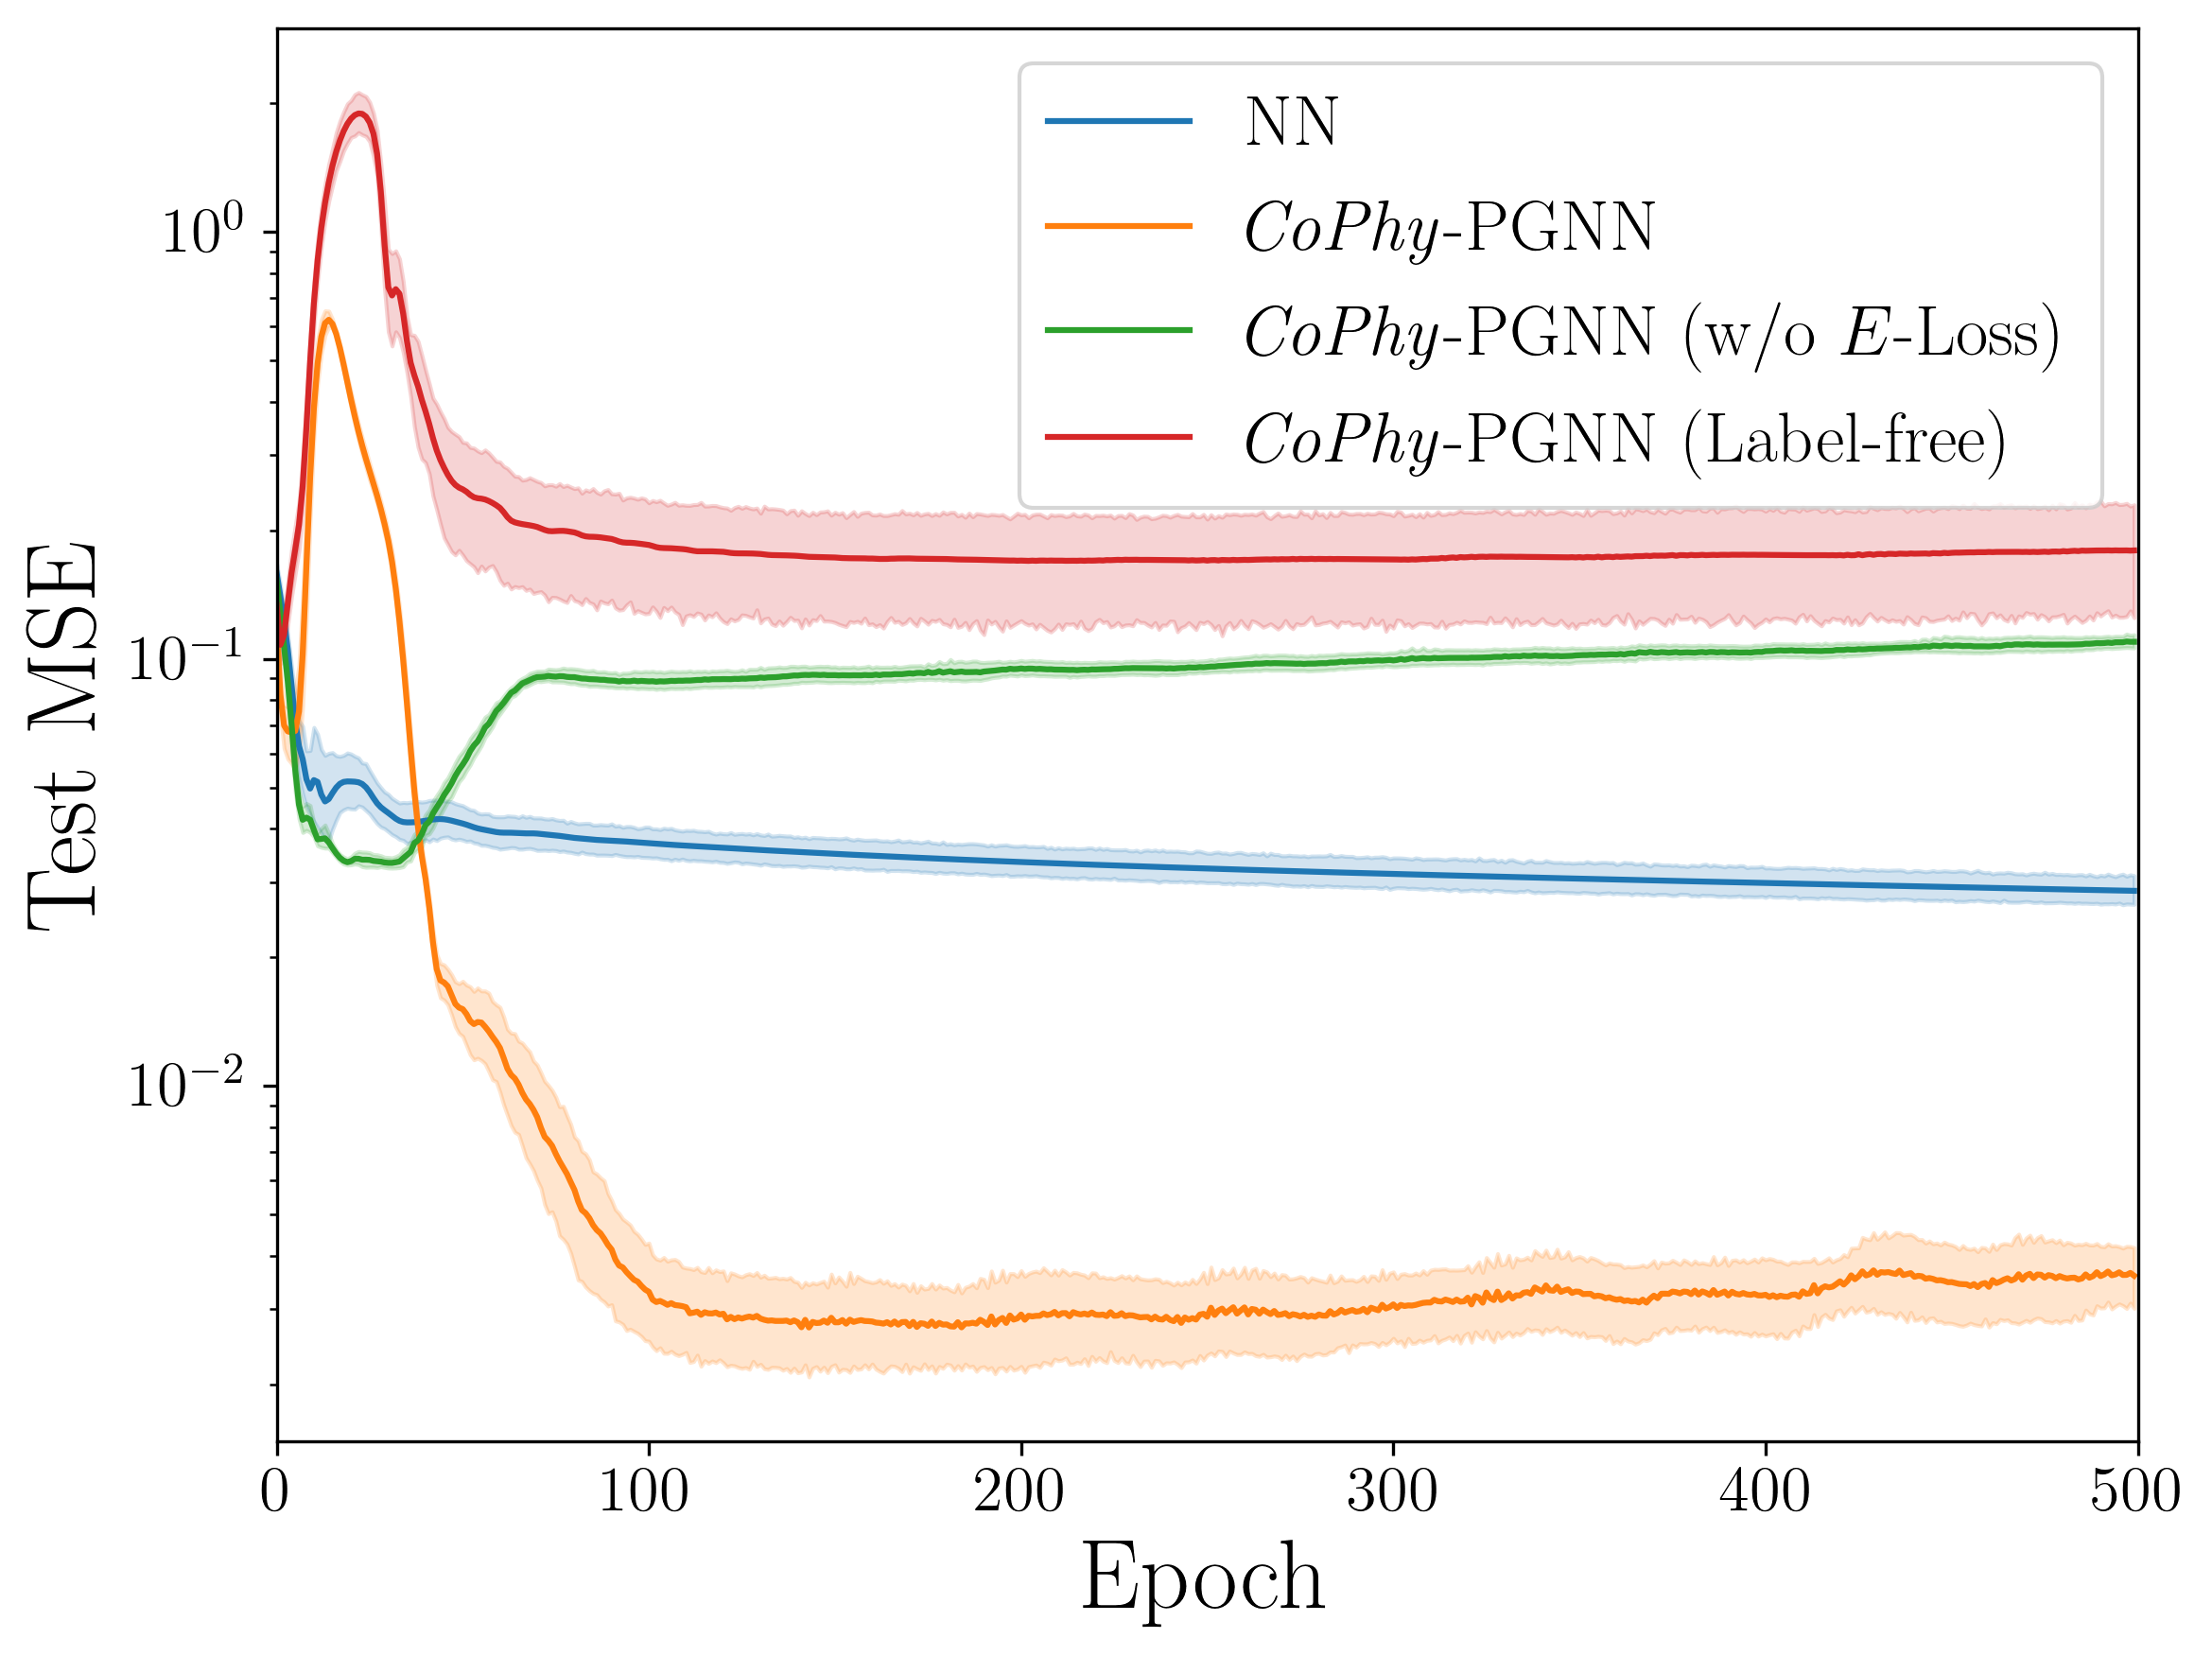

In [4]:
model_list = ['DNN', 'cNSE-NNex', 'cNS-NNex', 'cNSE-NNex-LF']
loss_dict = {}
for model in model_list:
    results = find_model(model, 1000)
    loss_dict[model] = [pd.read_csv(i['loss_csv']) for i in results]
    
# calculate loss dict
loss_dict_cat = {}
for model, losses in loss_dict.items():
    # save concatenated loss
    loss_dict_cat[model] = pd.concat(losses)
    col = loss_dict_cat[model].columns
    loss_dict_cat[model].columns = [i.replace("_", " ") for i in col]
        
# only for seven models
fig, ax = plt.subplots(figsize=(8, 6))

ax.set(xlim=(0, 500))
mb = master_bar(model_list)
for model in mb:
    losses = loss_dict_cat[model]
    name = model.replace('DNN', 'NN')
    if name == 'cNSE-NNex':
        name = r'\emph{CoPhy}-PGNN'
    if name == 'cNS-NNex':
        name = r'\emph{CoPhy}-PGNN (w/o $E$-Loss)'
    if name == 'cNSE-NNex-LF':
        name = r'\emph{CoPhy}-PGNN (Label-free)'
    sns.lineplot(data=losses['test mse'], ax=ax, label=name)
    title = "Convergence On The Test Set"
    ax.set_xlabel("Epoch", fontsize=25)
    ax.set_ylabel('Test MSE', fontsize=25)
plt.yscale('log')
ax.legend(fontsize=18)
fig.subplots_adjust(bottom=0.15, left=0.13, right=0.95, top=0.98)
plt.show()

fig.savefig('../../../figures/%s.pdf' % title, dpi = 200)

### Train MSE

DNN 10
cNSE-NNex 10
cNS-NNex 10
cNSE-NNex-LF 10


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


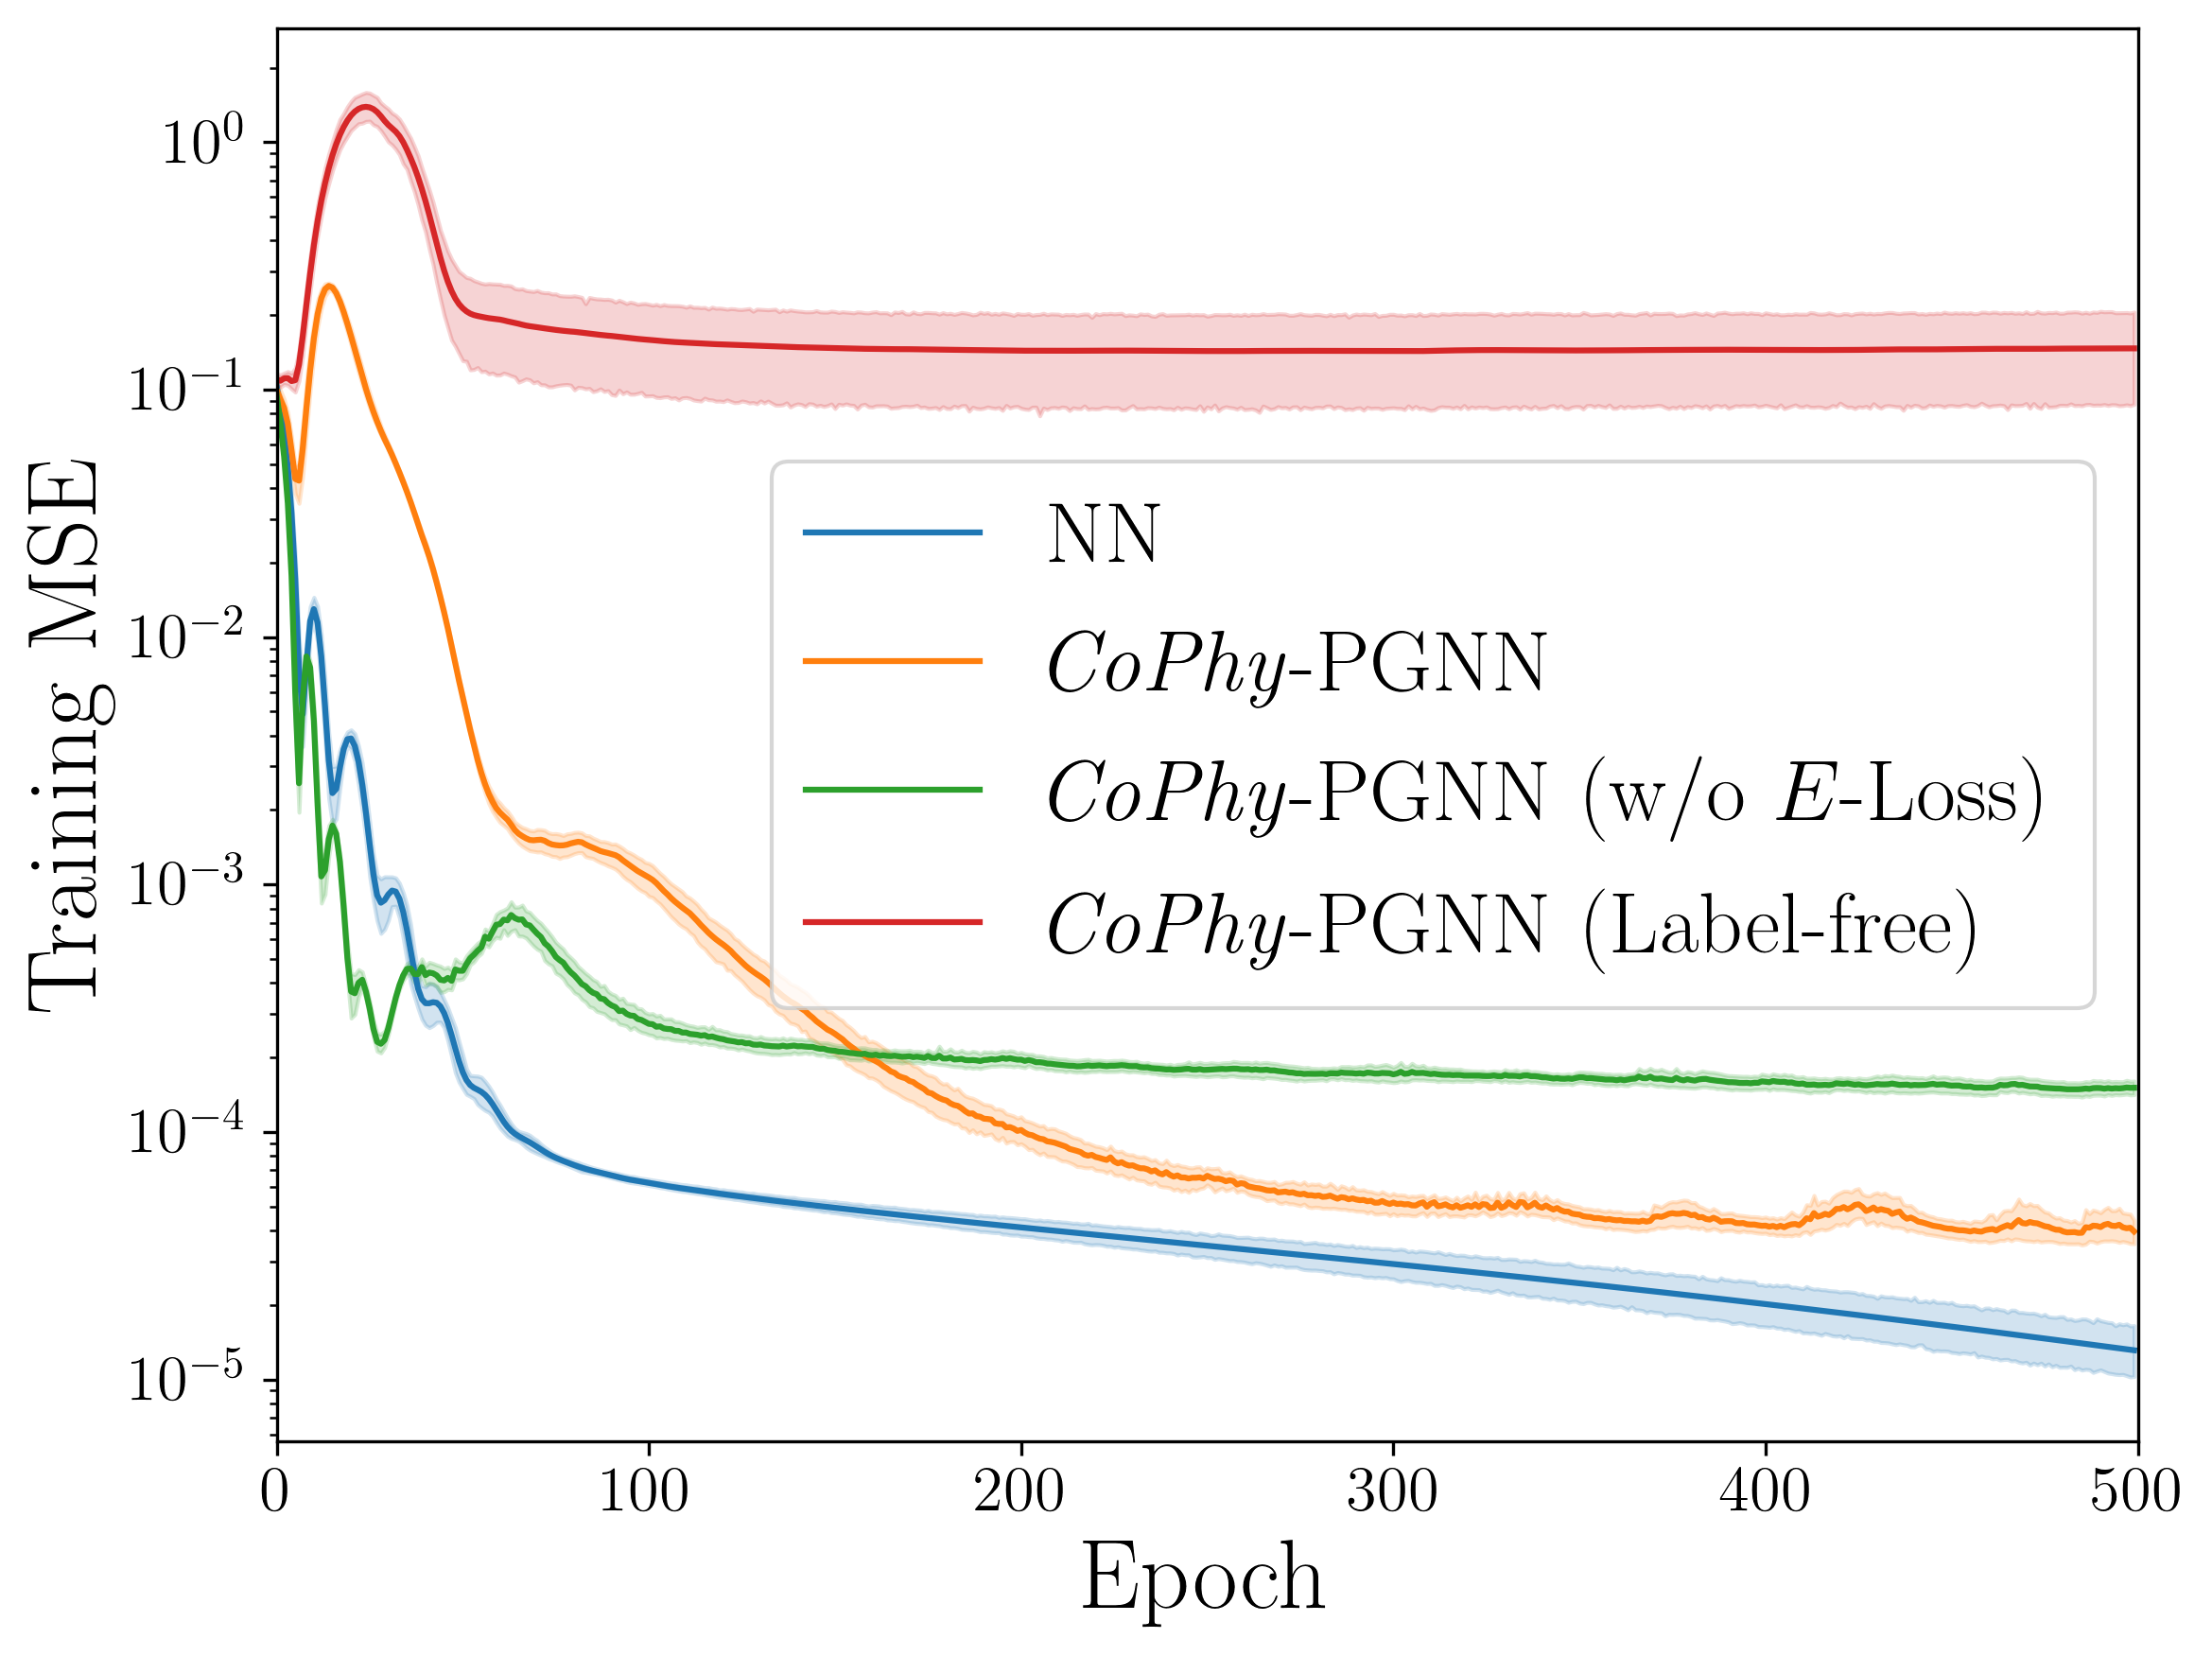

In [5]:
model_list = ['DNN', 'cNSE-NNex', 'cNS-NNex', 'cNSE-NNex-LF']
loss_dict = {}
for model in model_list:
    results = find_model(model, 1000)
    loss_dict[model] = [pd.read_csv(i['loss_csv']) for i in results]
    
# calculate loss dict
loss_dict_cat = {}
for model, losses in loss_dict.items():
    # save concatenated loss
    loss_dict_cat[model] = pd.concat(losses)
    col = loss_dict_cat[model].columns
    loss_dict_cat[model].columns = [i.replace("_", " ") for i in col]
        
# only for seven models
fig, ax = plt.subplots(figsize=(8, 6))

ax.set(xlim=(0, 500))
mb = master_bar(model_list)
for model in mb:
    losses = loss_dict_cat[model]
    name = model.replace('DNN', 'NN')
    if name == 'cNSE-NNex':
        name = r'\emph{CoPhy}-PGNN'
    if name == 'cNS-NNex':
        name = r'\emph{CoPhy}-PGNN (w/o $E$-Loss)'
    if name == 'cNSE-NNex-LF':
        name = r'\emph{CoPhy}-PGNN (Label-free)'
    sns.lineplot(data=losses['train mse'], ax=ax, label=name)
    title = "Convergence On The Training Set"
    ax.set_xlabel("Epoch", fontsize=25)
    ax.set_ylabel('Training MSE', fontsize=25)
plt.yscale('log')
ax.legend(fontsize=22)
fig.subplots_adjust(bottom=0.15, left=0.13, right=0.95, top=0.98)
plt.show()

fig.savefig('../../../figures/%s.pdf' % title, dpi = 200)

### Phy-Loss

DNN 10
cNSE-NNex 10
cNS-NNex 10
cNSE-NNex-LF 10


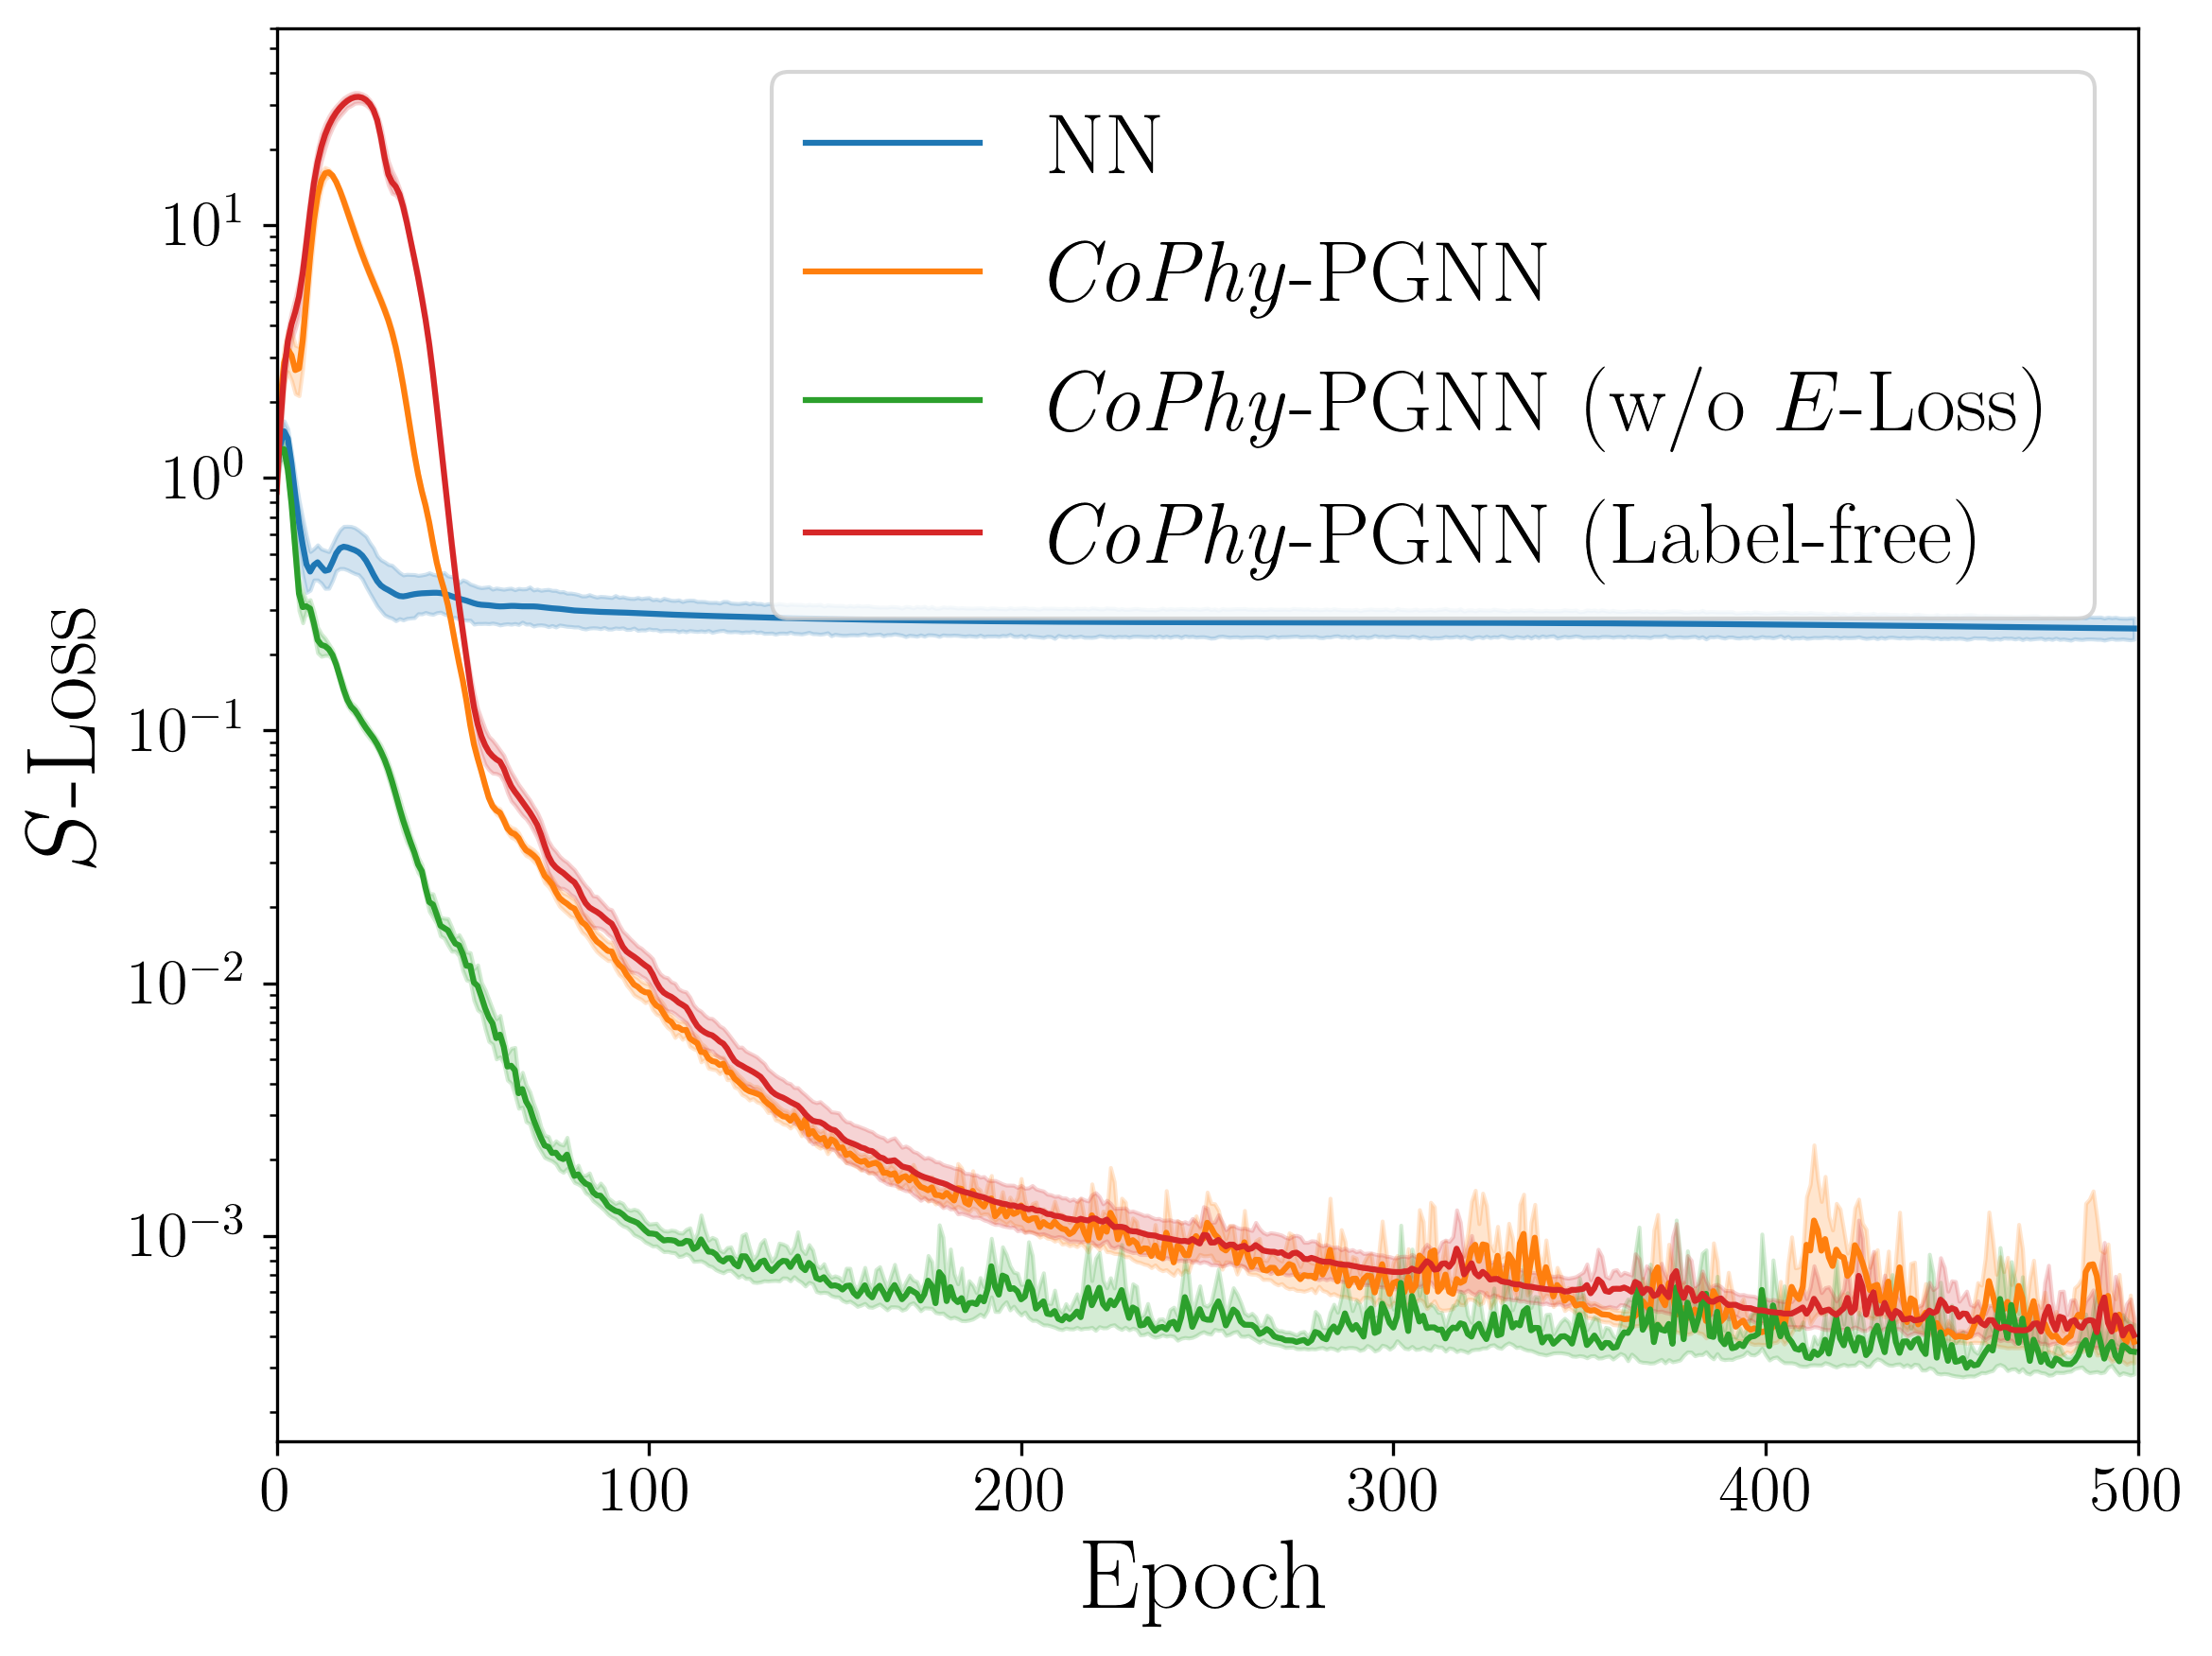

In [6]:
model_list = ['DNN', 'cNSE-NNex', 'cNS-NNex', 'cNSE-NNex-LF']
loss_dict = {}
for model in model_list:
    results = find_model(model, 1000)
    loss_dict[model] = [pd.read_csv(i['loss_csv']) for i in results]
    
# calculate loss dict
loss_dict_cat = {}
for model, losses in loss_dict.items():
    # save concatenated loss
    loss_dict_cat[model] = pd.concat(losses)
    col = loss_dict_cat[model].columns
    loss_dict_cat[model].columns = [i.replace("_", " ") for i in col]
        
# only for seven models
fig, ax = plt.subplots(figsize=(8, 6))

ax.set(xlim=(0, 500))
mb = master_bar(model_list)
for model in mb:
    losses = loss_dict_cat[model]
    name = model.replace('DNN', 'NN')
    if name == 'cNSE-NNex':
        name = r'\emph{CoPhy}-PGNN'
    if name == 'cNS-NNex':
        name = r'\emph{CoPhy}-PGNN (w/o $E$-Loss)'
    if name == 'cNSE-NNex-LF':
        name = r'\emph{CoPhy}-PGNN (Label-free)'
    sns.lineplot(data=losses['train norm phy']+losses['test norm phy'], ax=ax, label=name)
    title = "Normalized Schrodinger Loss On Training and Test Set"
    ax.set_xlabel("Epoch", fontsize=25)
    ax.set_ylabel('$S$-Loss', fontsize=25)
plt.yscale('log')    
ax.legend(fontsize=22)
fig.subplots_adjust(bottom=0.15, left=0.13, right=0.95, top=0.98)
fig.savefig('../../../figures/%s.pdf' % title, dpi = 200)
plt.show()

# Load Results

In [7]:
class Filter(object):
    def __init__(self, path):
        self.path=path
        self.dicts = []
    
    def match(self, model='DNN'):
        list_of_files = glob.glob(self.path)
        overlap = []
        epoch = []
        name = []
        loss_list = []
        loss_csv = {}
        train_size = []
        file_path = []
        if len(list_of_files) == 0:
            raise RuntimeError("Empty repository, no txt files found.")
        
        for i in range(len(list_of_files)):
            file = list_of_files[i]
            d = parse_results(file)
            
            loss_params = d['params']['loss_params']
            
            if d['name'] == model and not loss_params['cyclical']:
                self.dicts.append(d)
                name.append(d['name'])
                size = d['params']['data_params']['train_size']
                train_size.append(size)
                overlap.append(d['wave_function_overlap'])
                stop_epoch = min(int(d['epoch']), 499)
                epoch.append(stop_epoch)
                df = pd.read_csv(d['loss_csv'])
                if size not in loss_csv:
                    loss_csv[size] = []
                loss_csv[size].append(df)
                df = df.iloc[[stop_epoch]]
                loss_list.append(df)
                file_path.append(file)

        overlap = np.array(overlap)
        epoch = np.array(epoch)
        train_size = np.array(train_size)
        loss_df = pd.concat(loss_list, sort=False)
        
        df = pd.DataFrame({
            'names': name,
            'path': np.array(file_path),
            'overlap': overlap,
            'epoch': epoch,
            'train size': train_size
        }).reset_index(drop=True)
        
        self.df = df.join(loss_df.reset_index(drop=True))
        self.df = self.df.rename(columns={'test_mse':'mse'})
        print("Number of %s matches = %d" % (model, len(self.dicts)))
        return loss_csv

# Load Data

In [8]:
model_list = ['DNN', 'cNSE-NNex', 'NSE-NNex', 'cNSE-NN']

mse, overlap, epoch, elapse, train_size, dataframes = {}, {}, {}, {}, {}, {}

loss_dict = {}
for name in model_list:
    f = Filter('*.txt')    
    loss_dict[name] = f.match(name)
    name = name.replace('ex', '$_{ex}$')
    df = f.df
    mse[name] = df['mse'].values
    overlap[name] = df['overlap'].values
    epoch[name] = df['epoch'].values
    train_size[name] = df['train size'].values
    df['names'] = name
    dataframes[name] = df
    
    # time 
    time_per_epoch = []
    for item in f.dicts:
        time_per_epoch.append(item['time_per_epoch'])
    elapse[name] = np.array(time_per_epoch)
    
# change back current working directory
os.chdir('../../')

Number of DNN matches = 90
Number of cNSE-NNex matches = 90
Number of NSE-NNex matches = 90
Number of cNSE-NN matches = 90


In [9]:
stats = []
i = 1
for key, value in mse.items():
    model = np.repeat(np.array([key]), len(value))
    ID = np.repeat(np.array([i]), len(value))
    legend = np.repeat(np.array(["%d: %s" % (i, key)]), len(value))
    
    stats.append(pd.DataFrame({
        'models': model,
        'ID': ID,
        'legend': legend,
        'train size': train_size[key],
        'MSE': mse[key],
        'Wave Function Overlap': overlap[key],
        'Stopping Epochs': epoch[key],
        'Average Seconds Per Epoch': elapse[key]
    }))
    i += 1
    
stats = pd.concat(stats)

print("Loaded", len(stats), "Instances.")

Loaded 360 Instances.


## The Effects of Different Training Sizes

### MSE w.r.t Training Size

In [10]:
from IPython.display import display

# mean MSE
df_mse_mean = stats[['models', 'train size', 'MSE']]
df_mse_mean = df_mse_mean.groupby(['models', 'train size'])
df_mse_mean = df_mse_mean.mean()
multi_idx = df_mse_mean.index.levels
columns = pd.Index(multi_idx[1])
index = pd.Index(multi_idx[0])
index.name = None
columns.name  = '$\overline{MSE}$'
values = df_mse_mean.values.reshape((len(index), len(columns)))
df_mse_mean = pd.DataFrame(data=values, index=index, columns=columns)
display(df_mse_mean)

# std MSE
df_mse_std = stats[['models', 'train size', 'MSE']]
df_mse_std = df_mse_std.groupby(['models', 'train size'])
df_mse_std = df_mse_std.std()
multi_idx = df_mse_std.index.levels
columns = pd.Index(multi_idx[1])
index = pd.Index(multi_idx[0])
index.name = None
columns.name  = '$\sigma_{MSE}$'
values = df_mse_std.values.reshape((len(index), len(columns)))
df_mse_std = pd.DataFrame(data=values, index=index, columns=columns)
display(df_mse_std)

$\overline{MSE}$,100,200,500,1000,2000,5000,10000,15000,20000
DNN,0.027182,0.032144,0.028569,0.028639,0.028943,0.028930,0.029293,0.027491,0.028348
NSE-NN$_{ex}$,0.024233,0.022261,0.007567,0.008547,0.003017,0.014584,0.021112,0.019846,0.001880
cNSE-NN,0.034654,0.034062,0.032921,0.031449,0.033065,0.034384,0.033154,0.032464,0.031801
cNSE-NN$_{ex}$,0.004006,0.004138,0.004376,0.003663,0.003376,0.004329,0.004324,0.004476,0.004580


$\sigma_{MSE}$,100,200,500,1000,2000,5000,10000,15000,20000
DNN,0.003539,0.007245,0.001999,0.003792,0.003621,0.003873,0.002329,0.002532,0.002379
NSE-NN$_{ex}$,0.036169,0.034632,0.014650,0.017465,0.002396,0.025572,0.030368,0.027750,0.001000
cNSE-NN,0.003298,0.002826,0.004568,0.002467,0.002975,0.003976,0.002371,0.003602,0.003086
cNSE-NN$_{ex}$,0.001094,0.001648,0.001654,0.001287,0.001243,0.001011,0.002037,0.000737,0.001643


### Wave Function Overlap w.r.t Training Size

In [11]:
# mean overlap
df_wf_mean = stats[['models', 'train size', 'Wave Function Overlap']]
df_wf_mean = df_wf_mean.groupby(['models', 'train size'])
df_wf_mean = df_wf_mean.mean()
multi_idx = df_wf_mean.index.levels
columns = pd.Index(multi_idx[1])
index = pd.Index(multi_idx[0])
index.name = None
columns.name  = '$\overline{I_{wf}}$'
values = df_wf_mean.values.reshape((len(index), len(columns)))
df_wf_mean = pd.DataFrame(data=values, index=index, columns=columns)
display(df_wf_mean)

# std overlap
df_wf_std = stats[['models', 'train size', 'Wave Function Overlap']]
df_wf_std = df_wf_std.groupby(['models', 'train size'])
df_wf_std = df_wf_std.std()
multi_idx = df_wf_std.index.levels
columns = pd.Index(multi_idx[1])
index = pd.Index(multi_idx[0])
index.name = None
columns.name  = '$\sigma_{I_{wf}}$'
values = df_wf_std.values.reshape((len(index), len(columns)))
df_wf_std = pd.DataFrame(data=values, index=index, columns=columns)
display(df_wf_std)

$\overline{I_{wf}}$,100,200,500,1000,2000,5000,10000,15000,20000
DNN,0.956008,0.948744,0.950841,0.953185,0.952324,0.950144,0.954443,0.957204,0.949078
NSE-NN$_{ex}$,0.942743,0.943665,0.979666,0.979711,0.995581,0.964032,0.947101,0.947711,0.996911
cNSE-NN,0.939664,0.936862,0.937453,0.936064,0.939458,0.941102,0.935927,0.934613,0.942654
cNSE-NN$_{ex}$,0.994444,0.994295,0.994111,0.995001,0.995131,0.994140,0.994496,0.994212,0.994236


$\sigma_{I_{wf}}$,100,200,500,1000,2000,5000,10000,15000,20000
DNN,0.005298,0.007325,0.003347,0.005754,0.005668,0.004470,0.004576,0.006634,0.002105
NSE-NN$_{ex}$,0.086459,0.087755,0.049225,0.048880,0.001097,0.066232,0.078195,0.077917,0.000387
cNSE-NN,0.007677,0.010187,0.009127,0.009124,0.008113,0.005745,0.008092,0.007130,0.009202
cNSE-NN$_{ex}$,0.001075,0.001715,0.001844,0.001230,0.001447,0.001173,0.002028,0.000579,0.001317


## Visualize

In [12]:
df_wf_mean

$\overline{I_{wf}}$,100,200,500,1000,2000,5000,10000,15000,20000
DNN,0.956008,0.948744,0.950841,0.953185,0.952324,0.950144,0.954443,0.957204,0.949078
NSE-NN$_{ex}$,0.942743,0.943665,0.979666,0.979711,0.995581,0.964032,0.947101,0.947711,0.996911
cNSE-NN,0.939664,0.936862,0.937453,0.936064,0.939458,0.941102,0.935927,0.934613,0.942654
cNSE-NN$_{ex}$,0.994444,0.994295,0.994111,0.995001,0.995131,0.994140,0.994496,0.994212,0.994236


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


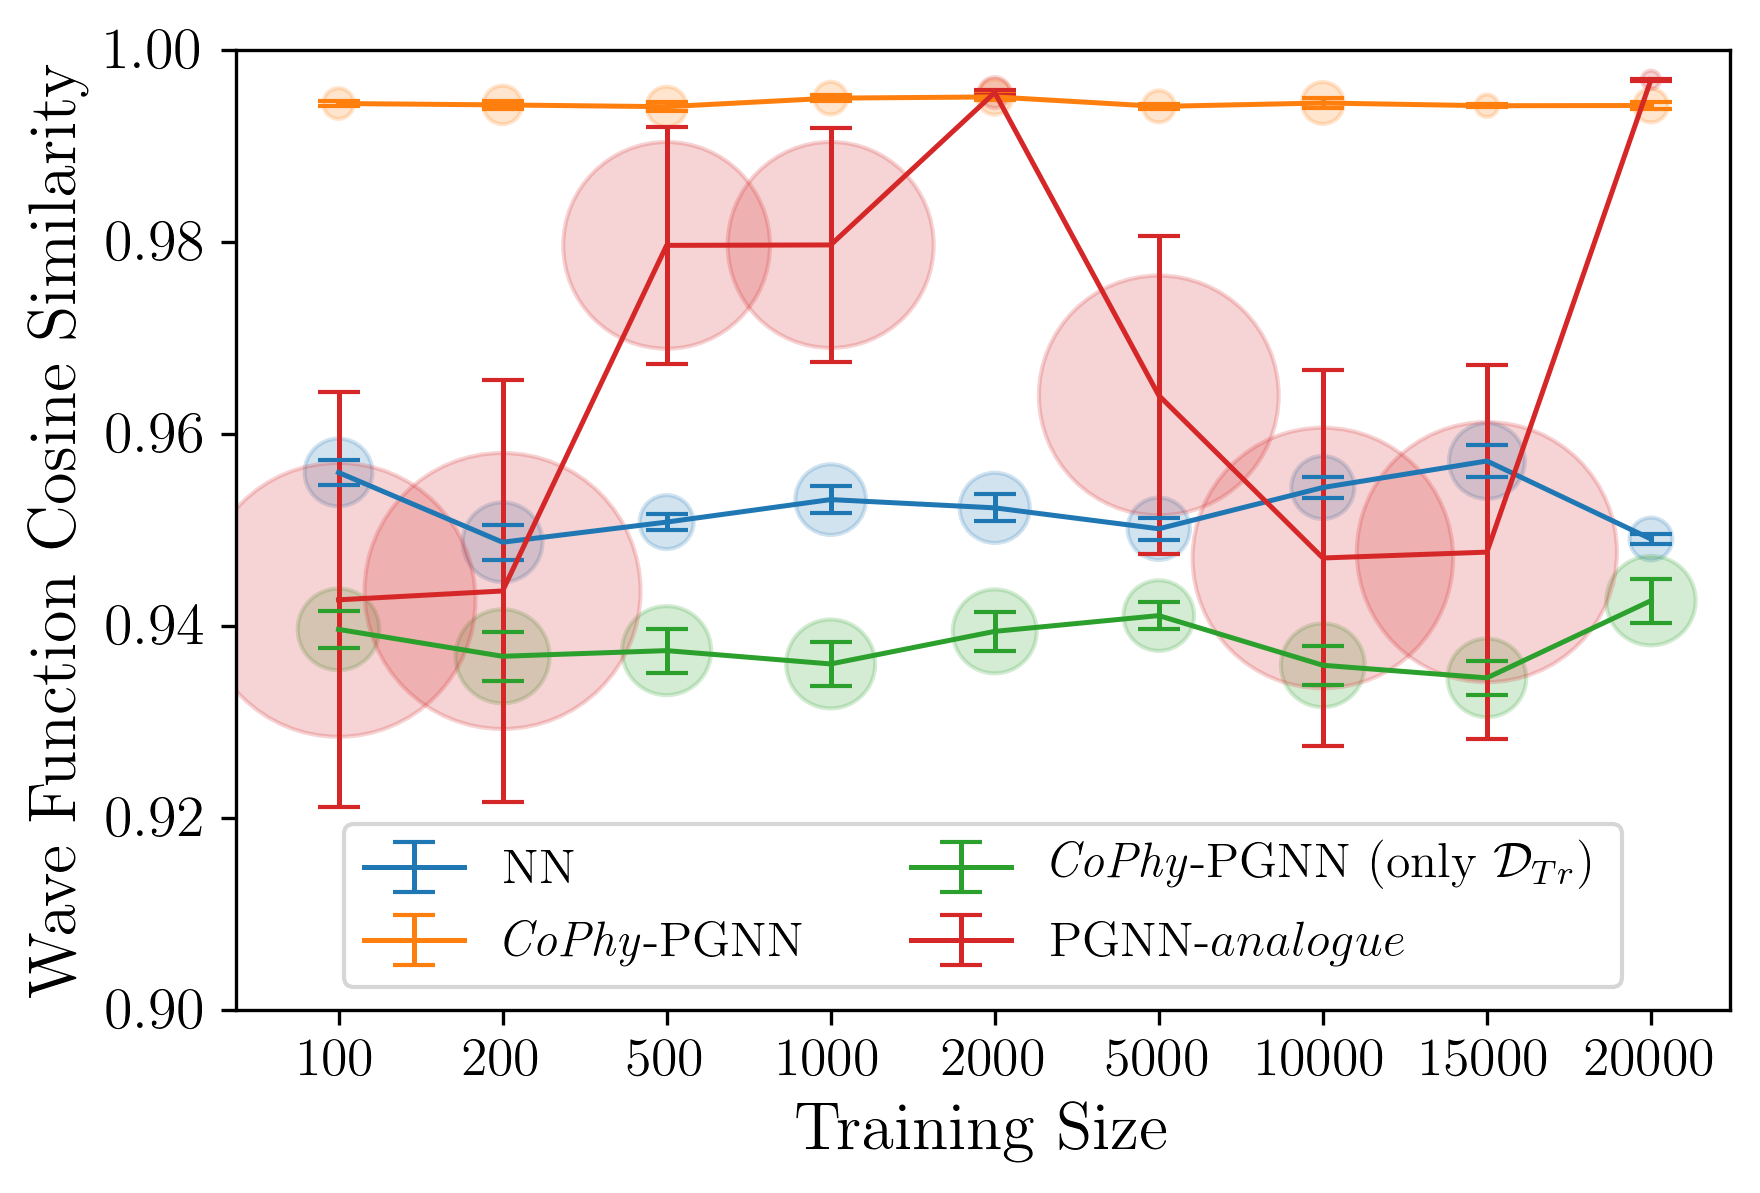

In [13]:
# only for seven models
candidate = ['DNN', 'cNSE-NN$_{ex}$', 'cNSE-NN', 'NSE-NN$_{ex}$']

# fig, ax = plt.subplots(figsize=(8, 6))
fig, ax = plt.subplots(figsize=(6, 4))

sns.set_palette(sns.color_palette())

for model in candidate:
    serie_mean = df_wf_mean.loc[model]
    serie_std = df_wf_std.loc[model]
    train_size = serie_mean.index.sort_values()
    df_model = pd.DataFrame({
        'train size': train_size.astype(str),
        'mean': serie_mean[train_size].values,
        'std': serie_std[train_size]
    }) 

    color = ax.scatter(
        x=df_model['train size'].values, 
        y=df_model['mean'].values, 
        s=df_model['std'].values * 50000,
        marker='o', 
        alpha=0.2 
    ).get_facecolor()
    
    color = np.array(color.ravel())
    color[-1] = 1.0
    name = model.replace('DNN', 'NN')
    if name == 'NSE-NN$_{ex}$':
        name = 'PGNN-$analogue$'
    if name == 'cNSE-NN$_{ex}$':
        name = r'\emph{CoPhy}-PGNN'
    if name == 'cNS-NN$_{ex}$':
        name = r'\emph{CoPhy}-PGNN (w/o $E$-Loss)'
    if name == 'cNSE-NN':
        name = r'\emph{CoPhy}-PGNN (only $\mathcal{D}_{Tr}$)'
    plt.errorbar(
        x=df_model['train size'].values, 
        y=df_model['mean'].values, 
        yerr=df_model['std'].values * 0.25,
        capsize=5,
        label=name,
        lw=1.2,
        color=color
    )

ax.set_xlabel("Training Size")
ax.set_ylabel("Wave Function Cosine Similarity")
leg = ax.legend(loc='upper center', fontsize=12, bbox_to_anchor=(0.5, 0.22),
          fancybox=True, shadow=False, ncol=2)
ax.set(ylim=(0.9, 1.0))
for handle in leg.legendHandles:
    handle._sizes = [30]
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
fig.subplots_adjust(bottom=0.15, left=0.15, right=0.98, top=0.95)

fig.savefig('../figures/Cosine Similarity vs. Training Size.pdf')
plt.show()